# Обработка текстов на естественном языке на основе векторных представлений

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

### Конструирование векторных представлений

In [33]:
from keras.datasets import imdb
from keras import preprocessing

# Максимальное количество используемых слов
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# Ограничение длины входных последовательностей
maxlen = 600
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [34]:
len(y_train)

25000

In [35]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# Первый аргумент слоя Embedding - количество возможных токенов (размер словаря), второй - 
# размерность семантического пространства
# Необходимо зафиксировать длину входных последовательностей input_length для использования
# слоя Flatten или Dense 
model.add(Embedding(max_features, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 600, 8)            80000     
_________________________________________________________________
flatten_7 (Flatten)          (None, 4800)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4801      
Total params: 84,801
Trainable params: 84,801
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
   32/25000 [..............................] - ETA: 49s - loss: 0.6910 - acc: 0.5312

C:\Users\Admin\.conda\envs\tensorflow-37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


25000/25000 [==============================] - 3s 118us/step - loss: 0.5301 - acc: 0.7388 - val_loss: 0.3308 - val_acc: 0.8700
Epoch 2/10
25000/25000 [==============================] - 3s 115us/step - loss: 0.2673 - acc: 0.8947 - val_loss: 0.2764 - val_acc: 0.8834
Epoch 3/10
25000/25000 [==============================] - 3s 113us/step - loss: 0.2131 - acc: 0.9177 - val_loss: 0.2726 - val_acc: 0.8866
Epoch 4/10
25000/25000 [==============================] - 3s 113us/step - loss: 0.1846 - acc: 0.9300 - val_loss: 0.2715 - val_acc: 0.8897
Epoch 5/10
25000/25000 [==============================] - 3s 114us/step - loss: 0.1647 - acc: 0.9395 - val_loss: 0.2789 - val_acc: 0.8885
Epoch 6/10
25000/25000 [==============================] - 3s 114us/step - loss: 0.1478 - acc: 0.9466 - val_loss: 0.3061 - val_acc: 0.8799
Epoch 7/10
25000/25000 [==============================] - 3s 114us/step - loss: 0.1326 - acc: 0.9527 - val_loss: 0.3001 - val_acc: 0.8848
Epoch 8/10
25000/25000 [=====================

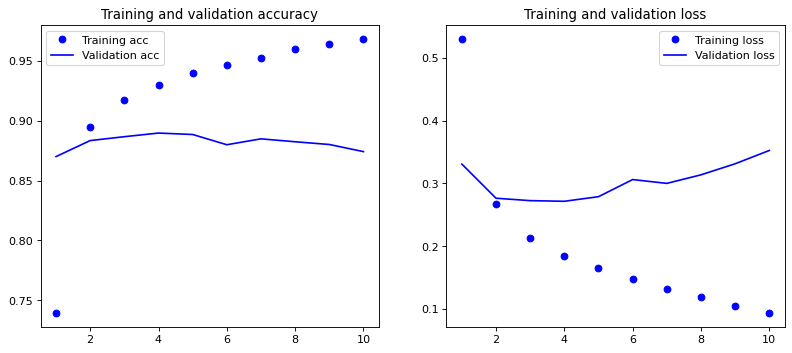

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1,2,1)
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Использование предобученных векторных представлений

Решим задачу классификации отзывов при отсутствии достаточного объема обучающей выборки.

In [7]:
import os
# Архив доступен на http://ai.stanford.edu/~amaas/data/sentiment/
imdb_dir = 'C:\\Users\\Admin\\NeuralNet\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            try:
                texts.append(f.read())
            except UnicodeDecodeError:
                continue
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # Ограничение длины каждого отзыва
training_samples = 200  # Количество отзывов для использования
validation_samples = 10000 
max_words = 10000  # Длина словаря

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Формирование обучающей и валидационной частей выборки
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88498 unique tokens.
Shape of data tensor: (24994, 100)
Shape of label tensor: (24994,)


In [9]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'if': 44,
 'has': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'get': 75,
 'bad': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [11]:
# Архив доступен на https://nlp.stanford.edu/projects/glove/
glove_dir = 'C:\\Users\\Admin\\NeuralNet\\glove'

embeddings_index = {}

with open(os.path.join(glove_dir, 'glove.6B.100d.txt')) as fp:
    while True:
        try:
            line = fp.readline()
            if not line:
                break
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        except (UnicodeDecodeError, ValueError, IndexError):
            continue

print('Found %s word vectors.' % len(embeddings_index))

Found 399830 word vectors.


In [12]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None and len(embedding_vector) == embedding_dim:
            embedding_matrix[i] = embedding_vector

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10001     
Total params: 1,010,001
Trainable params: 1,010,001
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/20
200/200 [==============================] - 1s 3ms/step - loss: 1.2266 - acc: 0.4700 - val_loss: 1.8101 - val_acc: 0.5089
Epoch 2/20
200/200 [==============================] - 0s 2ms/step - loss: 0.5707 - acc: 0.7500 - val_loss: 0.8929 - val_acc: 0.4978
Epoch 3/20
200/200 [==============================] - 0s 2ms/step - loss: 0.3638 - acc: 0.8800 - val_loss: 0.7089 - val_acc: 0.5559
Epoch 4/20
200/200 [==============================] - 0s 2ms/step - loss: 0.2821 - acc: 0.9600 - val_loss: 1.0215 - val_acc: 0.4953
Epoch 5/20
200/200 [==============================] - 0s 2ms/step - loss: 0.3017 - acc: 0.8900 - val_loss: 1.0149 - val_acc: 0.5162
Epoch 6/20
200/200 [==============================] - 0s 2ms/step - loss: 0.1909 - acc: 0.9550 - val_loss: 0.7079 - val_acc: 0.5691
Epoch 7/20
200/200 [==============================] - 0s 2ms/step - loss: 0.1282 - acc: 0.9950 - val_loss: 0.7475 - val_acc: 0.5441
Epoch 8/20
200/200 [========

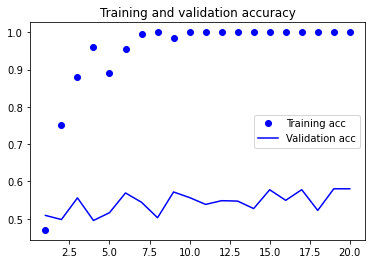

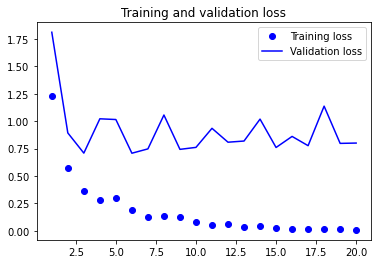

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Для сравнения применим сеть без загрузки предобученных весов:

In [17]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
# model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10001     
Total params: 1,010,001
Trainable params: 1,010,001
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/20
 32/200 [===>..........................] - ETA: 0s - loss: 0.6903 - acc: 0.5312

C:\Users\Admin\.conda\envs\tensorflow-37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


200/200 [==============================] - 1s 3ms/step - loss: 0.6914 - acc: 0.5350 - val_loss: 0.6923 - val_acc: 0.5082
Epoch 2/20
200/200 [==============================] - 1s 3ms/step - loss: 0.5761 - acc: 0.9800 - val_loss: 0.6920 - val_acc: 0.5171
Epoch 3/20
200/200 [==============================] - 0s 2ms/step - loss: 0.4942 - acc: 0.9800 - val_loss: 0.6919 - val_acc: 0.5181
Epoch 4/20
200/200 [==============================] - 0s 2ms/step - loss: 0.4139 - acc: 0.9800 - val_loss: 0.6919 - val_acc: 0.5183
Epoch 5/20
200/200 [==============================] - 0s 2ms/step - loss: 0.3361 - acc: 0.9900 - val_loss: 0.6926 - val_acc: 0.5226
Epoch 6/20
200/200 [==============================] - 0s 2ms/step - loss: 0.2639 - acc: 0.9950 - val_loss: 0.6928 - val_acc: 0.5255
Epoch 7/20
200/200 [==============================] - 0s 2ms/step - loss: 0.2012 - acc: 1.0000 - val_loss: 0.6938 - val_acc: 0.5313
Epoch 8/20
200/200 [==============================] - 0s 2ms/step - loss: 0.1505 - acc:

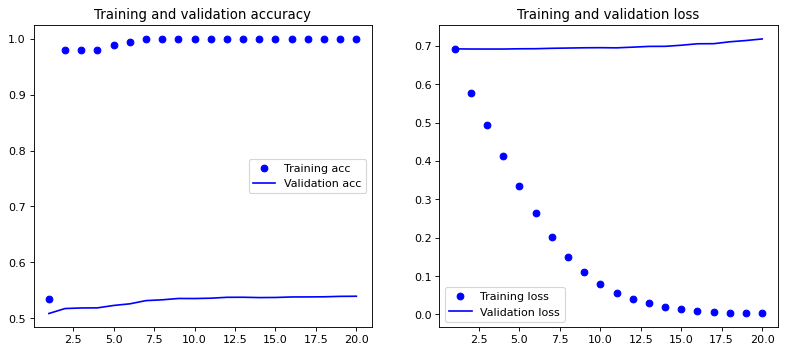

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12, 5), dpi=80)
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1,2,2)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()